# CSCA 5632 Unsupervised Algorithms in Machine Learning Final Project

## 1. Abstract <a class="anchor" id="abstract"></a>

In the field of marketing, accurately segmenting customer groups is key to optimizing the efficiency of advertising budgets. This process helps ensure that every dollar spent on advertising yields a higher return for the company. I have selected a dataset provided by Analytics Vidhya through a hackathon, which includes features that allow me to segment customers into four distinct categories. Although the training set in this dataset includes labels, I will treat this task as an unsupervised learning attempt, using multiple unsupervised learning algorithms to build models. The goal is to evaluate the effectiveness of unsupervised methods (AgglomerativeClustering and K-means) for customer segmentation and compare them with traditional supervised learning models (Support Vector, Logistic Regression) to identify the best approach.

The aim of this study is to develop a precise and efficient customer segmentation model that enables companies to allocate their advertising budgets more effectively, making every dollar spent more impactful in reaching target customers. Through this analysis, I hope to uncover new ways to optimize advertising expenditure, further enhancing the return on investment and supporting company profit growth.

## 2. Data Detail<a class="anchor" id="abstract"></a>

**Reference**<br>
As noted earlier, the dataset was collected from Kaggle. However, the provenance of the data is Analytics Vidhya. There is no additional information on how the data was obtained.

APA Citation:
<br>
Analytics Vidhya. (n.d.). JanataHack customer segmentation: Problem statement. Analytics Vidhya. https://www.analyticsvidhya.com/datahack/contest/janatahack-customer-segmentation/#ProblemStatement

**Kaggle Dataset**: https://www.kaggle.com/datasets/vetrirah/customer/data

**Kaggle Dataset Title**: *Customer Segmentation*

**Data Description**<br>
- Format: tabulated data<br>
- Training Data size: 8068 samples<br>
- Feature size: 9 features, 1 target variable (Segmentation), and 1 ID column<br>
- Features: ID column will be dropped as it will not add value to segmenting customers

**Description of Features**

Outlined below is the list of variables included in the raw data. Excluding the ID column, there are 9 features followed by the Segmentation, target variable. I will remove ID and Segmentation for the purposes of our unsupervised learning techniques. I will then later produce a few models with supervised learning to compare the performance against each other. The reason unsupervised learning approach is important, many times, I may not know who our customers are. I would need to segment customers based on available data to be able to make an effective data-driven marketing campaign.

|Index|Feature Name    |Description|
|:-   |:-|:-|
|0    |ID               |Customer ID       
|1    |Gender           |Gender of customer
|2    |Ever_Married     |Customer marital status     
|3    |Age              |Customer age
|4    |Graduated        |Whether customer graduated
|5    |Profession       |Customer profession
|6    |Work_Experience  |Customer work experience in years
|7    |Spending_Score   |Customer spending score
|8    |Family Size      |Number of family member a customer has (includes customer themselves)
|9    |Var_1            |Anonymized category for the customer
|10   |Segmentation     |Customer segment (target variable)

## 3. Library and Data Input

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
import matplotlib.pylab as plt 
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline 

In [2]:
df_train, df_test, df_sample = pd.read_csv("Train.csv"), pd.read_csv("Test.csv"), pd.read_csv("sample_submission.csv")
df_train.head(20)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [4]:
df_test.head(20)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6
7,459008,Female,Yes,47,Yes,Artist,1.0,Average,3.0,Cat_6
8,459013,Male,Yes,50,Yes,Artist,2.0,Average,4.0,Cat_6
9,459014,Male,No,19,No,Healthcare,0.0,Low,4.0,Cat_6


In [5]:
df_sample.head(20)

,ID,Segmentation
0,458989,A
1,458994,A
2,458996,A
3,459000,A
4,459001,A
5,459003,A
6,459005,A
7,459008,A
8,459013,A
9,459014,A


## 4. Data Cleaning and Analysis<a class="anchor" id="abstract"></a>

During data cleaning, the main steps included the following: First, rows with missing values in `gender`, `graduated`, `profession`, and similar fields were removed. The `ID` column was also dropped as it added no value to the analysis. Next, object-type features were encoded, and the target variable was converted from object type to integer for better compatibility with models.

In [6]:
print("Missing values in train set:")
print(df_train.isnull().sum())

print("Missing values in test set:")
print(df_test.isnull().sum())

Missing values in train set:
ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64
Missing values in test set:
ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64


In [7]:
df_clean = df_train.copy()


print("=== Unique Values in 'Segmentation' Column ===")
print(df_clean['Segmentation'].unique())
print("\n----------------------------------------")

df_clean['Segmentation'] = df_clean['Segmentation'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4})

print("=== First 5 Values in 'Segmentation' Column ===")
print(df_clean['Segmentation'].head(5).to_string(index=False))
print("\n----------------------------------------")

print("=== Last 5 Values in 'Segmentation' Column ===")
print(df_clean['Segmentation'].tail(5).to_string(index=False))
print("\n========================================\n")
df_clean = df_clean.dropna()

=== Unique Values in 'Segmentation' Column ===
['D' 'A' 'B' 'C']

----------------------------------------
=== First 5 Values in 'Segmentation' Column ===
4
1
2
2
1

----------------------------------------
=== Last 5 Values in 'Segmentation' Column ===
4
4
4
2
2




In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6665 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6665 non-null   int64  
 1   Gender           6665 non-null   object 
 2   Ever_Married     6665 non-null   object 
 3   Age              6665 non-null   int64  
 4   Graduated        6665 non-null   object 
 5   Profession       6665 non-null   object 
 6   Work_Experience  6665 non-null   float64
 7   Spending_Score   6665 non-null   object 
 8   Family_Size      6665 non-null   float64
 9   Var_1            6665 non-null   object 
 10  Segmentation     6665 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 624.8+ KB


In [9]:
# One-hot encode specified columns and drop the 'ID' column
df_encoded = pd.get_dummies(df_clean, columns=['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1'], drop_first=True)
df_encoded = df_encoded.drop(columns=['ID'])

# Display DataFrame information with formatted output
print("=== DataFrame Information After Encoding ===\n")
print(df_encoded.info())
print("\n=== Summary of Encoded DataFrame Columns ===")
print(f"Total Columns: {len(df_encoded.columns)}")
print("Encoded Columns:", list(df_encoded.columns))
print("\n==========================================\n")


=== DataFrame Information After Encoding ===

<class 'pandas.core.frame.DataFrame'>
Index: 6665 entries, 0 to 8067
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       6665 non-null   int64  
 1   Work_Experience           6665 non-null   float64
 2   Family_Size               6665 non-null   float64
 3   Segmentation              6665 non-null   int64  
 4   Gender_Male               6665 non-null   bool   
 5   Ever_Married_Yes          6665 non-null   bool   
 6   Graduated_Yes             6665 non-null   bool   
 7   Profession_Doctor         6665 non-null   bool   
 8   Profession_Engineer       6665 non-null   bool   
 9   Profession_Entertainment  6665 non-null   bool   
 10  Profession_Executive      6665 non-null   bool   
 11  Profession_Healthcare     6665 non-null   bool   
 12  Profession_Homemaker      6665 non-null   bool   
 13  Profession_Lawyer     

#### Exploratory Data Analysis

To gain a deeper understanding of the distribution characteristics of the target variable, I analyzed the sample count and proportion of each category within the target variable to check for any imbalance in the distribution. Additionally, this analysis aimed to identify whether there are still any anomalies or missing values in the target variable.

=== Counts of Each Category in 'Segmentation' Column ===
Segmentation
4    1757
3    1720
1    1616
2    1572
Name: count, dtype: int64

=== Proportions of Each Category in 'Segmentation' Column ===
Segmentation
4    0.263616
3    0.258065
1    0.242461
2    0.235859
Name: count, dtype: float64


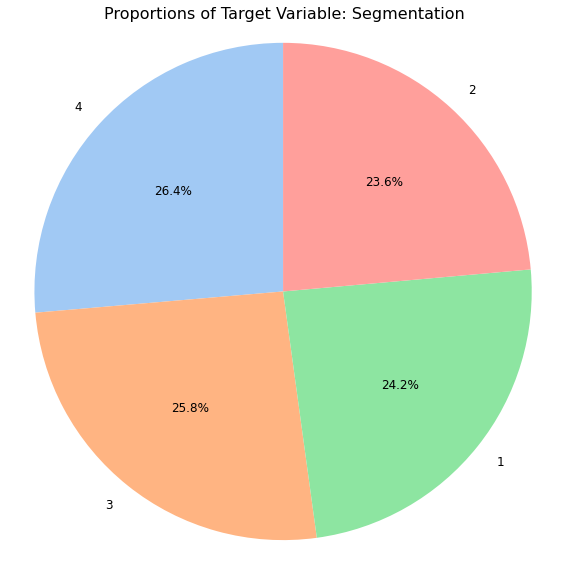

/tmp/ipykernel_12807/3614075959.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


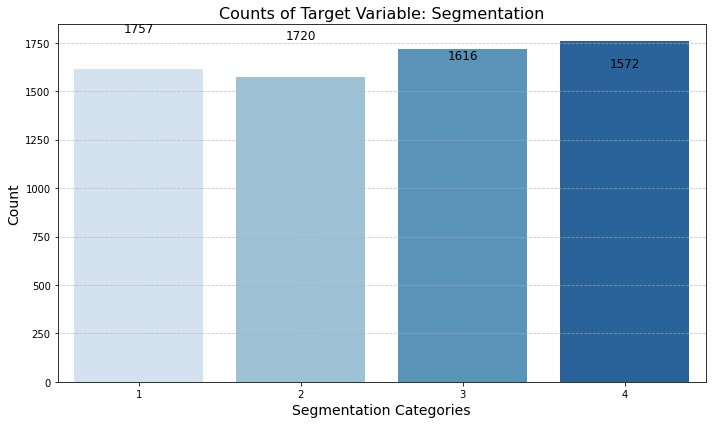

In [10]:
segmentation_counts = df_clean['Segmentation'].value_counts()
segmentation_proportions = segmentation_counts / segmentation_counts.sum()

print("=== Counts of Each Category in 'Segmentation' Column ===")
print(segmentation_counts)
print("\n=== Proportions of Each Category in 'Segmentation' Column ===")
print(segmentation_proportions)


plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')  
plt.pie(
    segmentation_counts,
    labels=segmentation_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12}
)
plt.title('Proportions of Target Variable: Segmentation', fontsize=16)
plt.axis('equal')  
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
bar_colors = sns.color_palette("Blues", len(segmentation_counts))

sns.barplot(
    x=segmentation_counts.index,
    y=segmentation_counts.values,
    palette=bar_colors
)


for i, count in enumerate(segmentation_counts.values):
    plt.text(i, count + 50, f'{count}', ha='center', fontsize=12)

plt.title('Counts of Target Variable: Segmentation', fontsize=16)
plt.xlabel('Segmentation Categories', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The proportions of each category are very close, with the difference between the largest and smallest categories being only 2.8 percentage points, indicating that the distribution of the target variable is relatively balanced. This is beneficial for the model to fairly learn the features of each category and reduces bias toward certain categories.

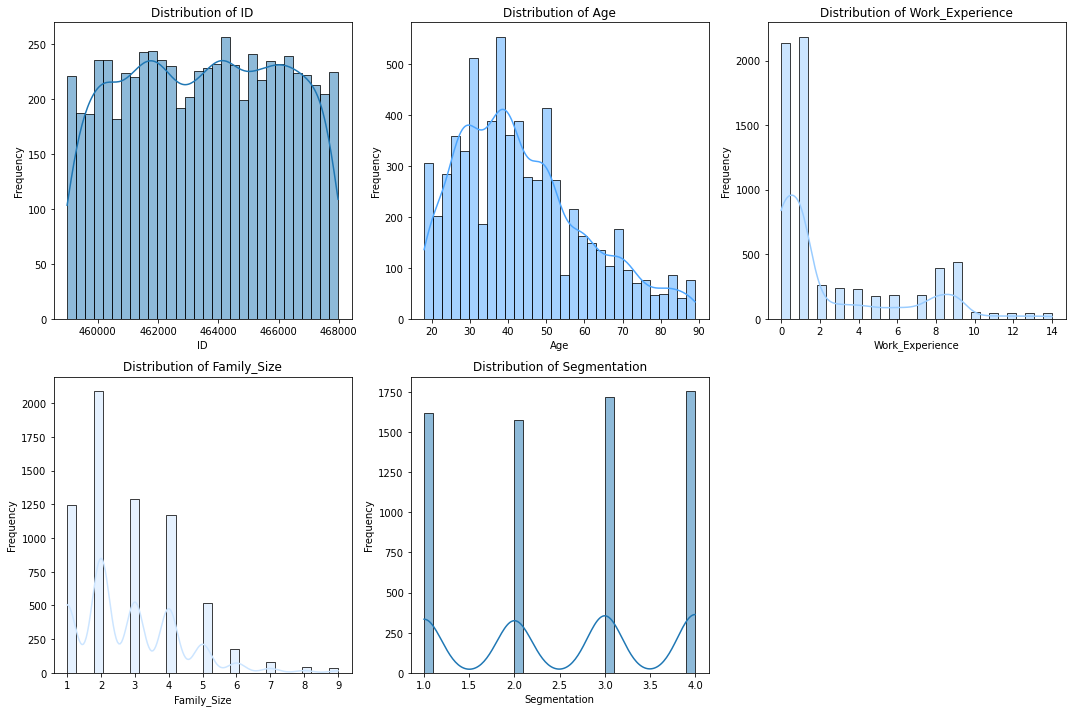

In [12]:
numeric_columns = df_clean.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
blue_palette = ['#1f77b4', '#4da6ff', '#99ccff', '#cce5ff']  

for i, column in enumerate(numeric_columns):
    plt.subplot((len(numeric_columns) + 2) // 3, 3, i + 1) 
    sns.histplot(df_clean[column], kde=True, bins=30, color=blue_palette[i % len(blue_palette)])
    plt.title(f'Distribution of {column}', fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
plt.tight_layout()
plt.show()

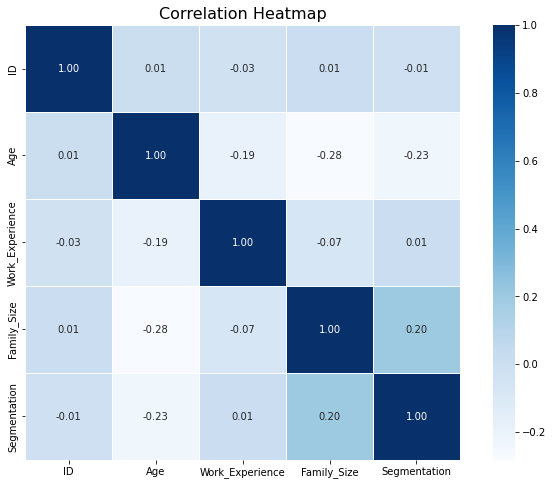

In [13]:
correlation_matrix = df_clean[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='Blues',  # blue
    fmt='.2f', 
    linewidths=0.5, 
    square=True
)
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## 5. Model

I have chosen to do 2 unsupervised (Agglomerative Cluster and K-Means) and 3 supervised (Random Forest, Support Vector and Logistic Regression) models. This includes several models that were not covered in the classroom. Additionally, I performed automatic hyperparameter tuning for the unsupervised models.
I used Accuracy as the evaluation metric in the result assessment and employed visual tables to compare the performance differences between these algorithms.

### 5.1 Unsupervised Models

In [ ]:
df_encoded[df_encoded.select_dtypes(include=[bool]).columns] = df_encoded[df_encoded.select_dtypes(include=[bool]).columns].astype(int)
df_encoded
# Convert boolean columns to integer
df_encoded[df_encoded.select_dtypes(include=[bool]).columns] = df_encoded.select_dtypes(include=[bool]).astype(int)

X = df_encoded.drop(columns=['Segmentation'])
y = df_encoded['Segmentation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reassign predicted labels based on optimal mapping to true labels
# Source: https://docs.neurodata.io/notebooks/pedigo/graspologic/clustering/2020/10/12/remapping-labels.html
def reassign_labels(true_labels, pred_labels, return_map=False):
    cm = confusion_matrix(true_labels, pred_labels)
    row_idx, col_idx = linear_sum_assignment(cm, maximize=True)
    mapping = {col_idx[i]: row_idx[i] for i in range(len(col_idx))}
    reassigned_labels = np.vectorize(mapping.get)(pred_labels)
    return (reassigned_labels, mapping) if return_map else reassigned_labels

# Source: https://github.com/Ofleitman/ML2_Final/tree/main
def acc_score(temp_model, X, y):
    reassigned_labels = reassign_labels(y, temp_model.fit_predict(X))
    return accuracy_score(y, reassigned_labels)


In [16]:
print(np.isnan(X_train_scaled).any())  
print(np.isnan(y_train).any())
print(np.unique(y_train))  

False
False
[1 2 3 4]


#### 5.1.1 Agglomerative Cluster

In [17]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
pred_labels = model.fit_predict(X_train_scaled)
reassigned_labels, mapping = reassign_labels(y_train, pred_labels, return_map=True)
print("Mapping:", mapping)
print("Reassigned Labels:", reassigned_labels)
print("Accuracy:", accuracy_score(y_train, reassigned_labels))

/root/miniconda3/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Mapping: {4: 0, 1: 1, 3: 2, 2: 3, 0: 4}
Reassigned Labels: [4 3 3 ... 3 3 4]
Accuracy: 0.37378094523630906


Hyperparameter search to output the optimal solution

In [23]:
from sklearn.model_selection import ParameterGrid

def optimize_agglomerative_clustering(X, y, metric_options, linkage_options, n_clusters_options):
    best_score = 0
    best_params = None
    best_labels = None
    

    param_grid = ParameterGrid({
        'metric': metric_options,
        'linkage': linkage_options,
        'n_clusters': n_clusters_options
    })
    
    for params in param_grid:

        if params['linkage'] == 'ward' and params['metric'] != 'euclidean':
            continue

        model = AgglomerativeClustering(
            n_clusters=params['n_clusters'],
            metric=params['metric'], 
            linkage=params['linkage']
        )
        pred_labels = model.fit_predict(X)
        
        reassigned_labels, _ = reassign_labels(y, pred_labels, return_map=True)

        score = accuracy_score(y, reassigned_labels)
        if score > best_score:
            best_score = score
            best_params = params
            best_labels = reassigned_labels
    
    return best_params, best_score, best_labels

metric_options = ['euclidean', 'manhattan', 'cosine']
linkage_options = ['ward', 'complete', 'average']
n_clusters_options = [2, 3, 4, 5, 6]

best_params, best_score, best_labels = optimize_agglomerative_clustering(
    X_train_scaled, y_train, metric_options, linkage_options, n_clusters_options
)

print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)


Best Parameters: {'linkage': 'complete', 'metric': 'cosine', 'n_clusters': 4}
Best Accuracy: 0.4028507126781695


#### 5.1.2 K-means

In [26]:
from sklearn.cluster import KMeans

def reassign_labels(true_labels, predicted_labels, return_map=False):

    from scipy.stats import mode
    new_labels = []
    mapping = {}
    
    for i in range(max(predicted_labels) + 1):
        mask = predicted_labels == i
        most_common_label = mode(true_labels[mask])[0][0]  
        mapping[i] = most_common_label
        new_labels.extend([most_common_label] * sum(mask))
    
    if return_map:
        return new_labels, mapping
    return new_labels

model = KMeans(n_clusters=4, random_state=42)
pred_labels = model.fit_predict(X_train_scaled)

reassigned_labels, mapping = reassign_labels(y_train, pred_labels, return_map=True)

print("Mapping:", mapping)
# print("Reassigned Labels:", reassigned_labels)

print("Accuracy:", accuracy_score(y_train, reassigned_labels))


/root/miniconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Mapping: {0: 1, 1: 1, 2: 4, 3: 3}
Accuracy: 0.2586271567891973


/tmp/ipykernel_12807/2547631910.py:12: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  most_common_label = mode(true_labels[mask])[0][0]


Hyperparameter search to output the optimal solution

In [29]:
from sklearn.cluster import KMeans
from scipy.stats import mode

def reassign_labels(true_labels, predicted_labels, return_map=False):
    new_labels = []
    mapping = {}
    
    for i in range(max(predicted_labels) + 1):
        mask = predicted_labels == i
        most_common_label = mode(true_labels[mask], keepdims=False)[0]  # 找到每个簇最常见的真实标签
        mapping[i] = most_common_label
        new_labels.extend([most_common_label] * sum(mask))
    
    if return_map:
        return new_labels, mapping
    return new_labels

def optimize_kmeans(X, y, n_clusters_options, init_options, max_iter_options, n_init_options):
    best_score = 0
    best_params = None
    best_model = None
    best_labels = None
 
    param_grid = ParameterGrid({
        'n_clusters': n_clusters_options,
        'init': init_options,
        'max_iter': max_iter_options,
        'n_init': n_init_options
    })
    
    for params in param_grid:
        model = KMeans(
            n_clusters=params['n_clusters'],
            init=params['init'],
            max_iter=params['max_iter'],
            n_init=params['n_init'],
            random_state=42
        )
        
        pred_labels = model.fit_predict(X)
        
        reassigned_labels, _ = reassign_labels(y, pred_labels, return_map=True)
        
        score = accuracy_score(y, reassigned_labels)
        if score > best_score:
            best_score = score
            best_params = params
            best_model = model
            best_labels = reassigned_labels
    
    return best_model, best_params, best_score, best_labels

n_clusters_options = [2, 3, 4, 5, 6]
init_options = ['k-means++', 'random']
max_iter_options = [100, 200, 300]
n_init_options = [10, 20, 30]

best_model, best_params, best_score, best_labels = optimize_kmeans(
    X_train_scaled, y_train, n_clusters_options, init_options, max_iter_options, n_init_options
)

print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)
print("Reassigned Labels:", best_labels)

print("Best KMeans Model:", best_model)


Best Parameters: {'init': 'random', 'max_iter': 100, 'n_clusters': 3, 'n_init': 10}
Best Accuracy: 0.2636909227306827
Reassigned Labels: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4

### 5.2 Supervised Models

#### 5.2.1 Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

X = df_encoded.drop(columns=['Segmentation'])
y = df_encoded['Segmentation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)


Random Forest Accuracy: 0.4831207801950488


#### 5.2.2 Support Vector Machine

In [31]:
from sklearn.svm import SVC

X = df_encoded.drop(columns=['Segmentation'])
y = df_encoded['Segmentation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)


SVM Accuracy: 0.49212303075768943


#### 5.2.3 Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

X = df_encoded.drop(columns=['Segmentation'])
y = df_encoded['Segmentation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train_scaled, y_train)

y_pred = logreg_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.5176294073518379


### 6. Results and Analsyis

The experiment compared both unsupervised and supervised models. Among the unsupervised models, **Agglomerative Clustering** performed best with an accuracy of 0.4029, while **K-means** showed a lower accuracy of 0.2637. In contrast, the supervised models outperformed the unsupervised ones, with **Logistic Regression** achieving the highest accuracy of 0.5176, followed by **Support Vector** (0.4921) and **Random Forest** (0.4831). 

These results indicate that supervised models, benefiting from labeled data, generally provide more accurate predictions than unsupervised models, which rely solely on discovering data patterns. The gap in performance highlights the advantage of supervised learning when labels are available, while unsupervised models may need further refinement for better alignment with true data patterns.


|Model|Type|Accuracy|
|:-|:-|:-|
|AgglomerativeClustering|Unsupervised|0.4029|
|K-means|Unsupervised|0.2637|
|Random Forest|Supervised|0.4831|
|Support Vector|Supervised|0.4921|
|Logistic Regression|Supervised|0.5176|

### 7. Discussion and Conclusion

**Reflection on Learning and Key Insights:**

Through this experiment, I learned more about the strengths and weaknesses of both unsupervised and supervised learning models. It is clear that supervised models, like Logistic Regression and Support Vector Machines, perform much better when there is labeled data. These models can learn the decision boundary from labels, which helps to improve accuracy. However, unsupervised models, like Agglomerative Clustering and K-means, have limitations. They try to find patterns in the data without labels, but often do not align well with true class labels, leading to lower accuracy. This taught me that the choice of model should depend on the data and the task at hand.

**Challenges and Solutions:**

One of the main challenges was the low accuracy of unsupervised models. These models could not accurately capture the true class structure because there was no label to guide them. In the future, I could try adjusting the hyperparameters more carefully or explore other clustering methods to improve performance. For supervised models, although the results were good, further tuning of hyperparameters, such as regularization in Logistic Regression or kernel type in Support Vector Machines, may help improve the results even more.

**Suggestions for Model Improvement:**

To make the models better, I think it is important to focus on feature engineering, especially for unsupervised learning. Choosing better features that can capture the data structure more clearly could help. For supervised models, I would suggest trying different cross-validation strategies, hyperparameter tuning, and maybe using different sampling techniques to improve accuracy. Moreover, a hybrid approach, where unsupervised models are used for feature extraction followed by supervised learning, could improve the overall performance of the model.

### 8. GitHub Repository

GitHub repository link: https://github.com/Bob-cmu/Unsupervised-Learning

### 9. References:
[1] https://www.analyticsvidhya.com/datahack/contest/janatahack-customer-segmentation/#ProblemStatement<br/>
[2] https://docs.neurodata.io/notebooks/pedigo/graspologic/clustering/2020/10/12/remapping-labels.html<br/>
[3] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html<br/>
[4] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html<br/>
[5] https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html<br/>
[6] https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html<br/>
[7]https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html<br/>
[8] https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html<br/>
[9] https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html<br/>
[10] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html<br/>
[11] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html<br/>
[12] https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html<br/>
[13] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html<br/>
[14] https://scikit-learn.org/stable/modules/generated/sklearn.base.clone.html<br/>
[15] https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree<br/>
[16] https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html<br/>
[17] https://cran.r-project.org/web/packages/summarytools/summarytools.pdf<br/>
[18] https://scikit-learn.org/stable/modules/model_evaluation.html<br/>
[19] https://www.kaggle.com/datasets/vetrirah/customer/data<br/>
[20] https://github.com/Ofleitman/ML2_Final/tree/main<br/>
[21] https://pandas.pydata.org/pandas-docs/stable/<br/>
[22] https://matplotlib.org/stable/contents.html<br/>
[23] https://imbalanced-learn.org/stable/<br/>
[24] https://docs.scipy.org/doc/scipy/<br/>
[25] https://scikit-learn.org/stable/<br/>
[26] https://numpy.org/doc/stable/<br/>
[27] https://seaborn.pydata.org/<br/>
Reference: While completing assignments, I might encounter some errors, which could be caused by a Python library that I am not familiar with. In such cases, I try to ask ChatGPT about the specific purpose and structural composition of the Python library.